In [151]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
from datetime import datetime
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [152]:
df1 = pd.read_csv('C:/Users/Mohini Agarwal/Downloads/UT/UT Academic material/Data Analytics Programming/Project/globalterrorismdb_0718dist.csv')

In [153]:
df = df1.copy(deep=True)

In [154]:
df['iyear'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

In [124]:
mask_day = (df['iday']==0)
mask_mnth = (df['imonth']==0)
df.loc[mask_day, 'iday']=1
df.loc[mask_mnth, 'imonth']=1
df = df.rename(columns = {'iyear':'year', 'imonth':'month', 'iday':'day'})
df[:5]

,eventid,year,month,day,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,1,1,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,1,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,1,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,1,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [25]:
df['date'] = pd.to_datetime(df[['day','month','year']])

# Attack type by year 

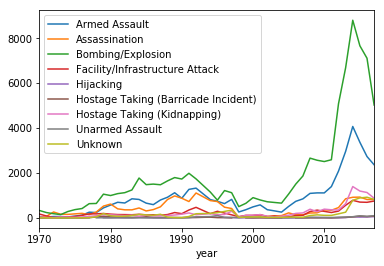

In [46]:
df['attacktype1_txt'].fillna('Unknown')
df2 =df.groupby(['year','attacktype1_txt'])['year'].agg('count').unstack()
df2.plot()
legend(loc = 'best')
show()

# # Suicide attacks by year

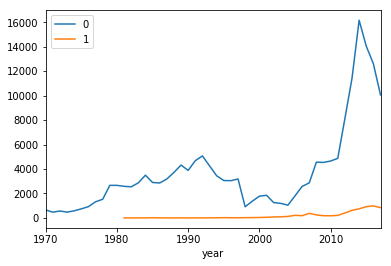

In [60]:
df['suicide'].fillna(0)
df2 =df.groupby(['year','suicide'])['year'].agg('count').unstack()
df2.plot()
legend(loc = 'best')
show()

# Group name by year

In [100]:
df2 = df[df['gname'] != 'Unknown']
df3 = df2.groupby(['gname','year'])['year'].agg('count').unstack()
top_gname = df3.idxmax().unique()
top_gname

array(['Left-Wing Militants', 'Irish Republican Army (IRA)',
       'Basque Fatherland and Freedom (ETA)',
       'Farabundo Marti National Liberation Front (FMLN)',
       'Shining Path (SL)', "Kurdistan Workers' Party (PKK)",
       'Liberation Tigers of Tamil Eelam (LTTE)',
       'Revolutionary Armed Forces of Colombia (FARC)', 'Chechen Rebels',
       'Moro Islamic Liberation Front (MILF)', 'Taliban',
       'Communist Party of India - Maoist (CPI-Maoist)',
       'Islamic State of Iraq and the Levant (ISIL)'], dtype=object)

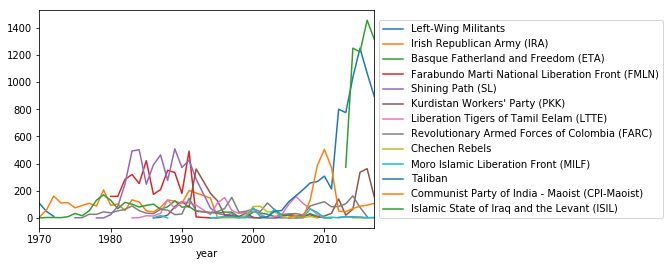

In [108]:
df4 = df2.groupby(['year','gname'])['year'].agg('count').unstack()
df4 = df4[['Left-Wing Militants', 'Irish Republican Army (IRA)',
       'Basque Fatherland and Freedom (ETA)',
       'Farabundo Marti National Liberation Front (FMLN)',
       'Shining Path (SL)', "Kurdistan Workers' Party (PKK)",
       'Liberation Tigers of Tamil Eelam (LTTE)',
       'Revolutionary Armed Forces of Colombia (FARC)', 'Chechen Rebels',
       'Moro Islamic Liberation Front (MILF)', 'Taliban',
       'Communist Party of India - Maoist (CPI-Maoist)',
       'Islamic State of Iraq and the Levant (ISIL)']]
#  ['L-W Militants', 'IRA','ETA','FMLN','SL','PKK','LTTE','FARC','Chechen Rebels','MILF','Taliban','CPI-Maoist','ISIL']
df4.plot()
legend(loc='center left', bbox_to_anchor=(1, 0.5))
show()

# Weapon type by year

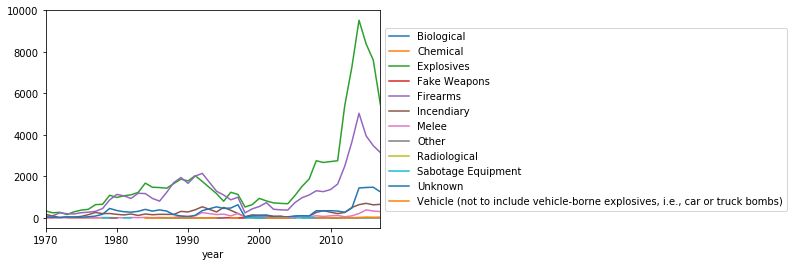

In [120]:
df['weaptype1_txt'].fillna('Unknown')
df2 =df.groupby(['year','weaptype1_txt'])['year'].agg('count').unstack()
df2.plot()
legend(loc='center left', bbox_to_anchor=(1, 0.5))
show()

In [126]:
df_new = df[df['country_txt'].isin(['Algeria', 'Colombia', 'El Salvador', 'India', 'Iraq', 'Italy','Pakistan', 
                                   'Peru', 'Turkey', 'United Kingdom', 'United States'])]

In [141]:
df_new.groupby(['weaptype1_txt','country_txt'])['country_txt'].agg('count').unstack().idxmax()

country_txt
Algeria           Explosives
Colombia            Firearms
El Salvador         Firearms
India             Explosives
Iraq              Explosives
Italy             Explosives
Pakistan          Explosives
Peru              Explosives
Turkey            Explosives
United Kingdom    Explosives
United States     Explosives
dtype: object

In [139]:
df_new.groupby(['country_txt','weaptype1_txt'])['country_txt'].agg('count').unstack().idxmax()

weaptype1_txt
Biological                                                                     United States
Chemical                                                                                Iraq
Explosives                                                                              Iraq
Fake Weapons                                                                   United States
Firearms                                                                            Pakistan
Incendiary                                                                             India
Melee                                                                                  India
Other                                                                          United States
Radiological                                                                   United States
Sabotage Equipment                                                                     India
Unknown                                                 

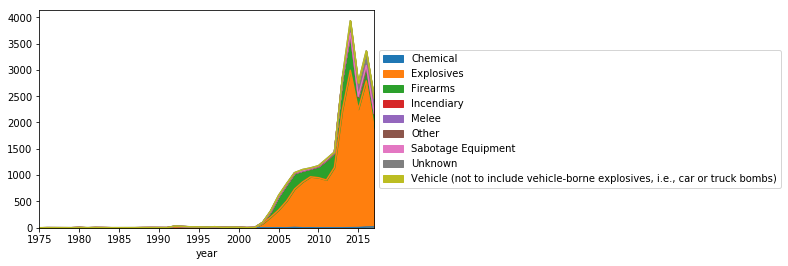

In [145]:
df_new1 = df_new[df_new['country_txt']=='Iraq']
df_new1.groupby(['year', 'weaptype1_txt'])['weaptype1_txt'].agg('count').unstack().plot.area()
legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [146]:
byCountry = df.groupby(['year', 'weaptype1_txt'])['year'].agg('count').unstack()
topTerror = pd.DataFrame(byCountry.idxmax(axis = 1))
topTerror.columns = ['country']
topTerror.groupby('country')['country'].agg('count')
topTerror.groupby('country')['country'].agg('count').index.values

array(['Explosives', 'Firearms'], dtype=object)

In [149]:
df_new.groupby(['country_txt','weaptype1_txt'])['weaptype1_txt'].agg(['count'])

count
country_txt    weaptype1_txt                                            
Algeria        Explosives                                           1102
               Fake Weapons                                            1
               Firearms                                             1008
               Incendiary                                             54
               Melee                                                 306
               Other                                                   1
               Sabotage Equipment                                      1
               Unknown                                               270
Colombia       Chemical                                               12
               Explosives                                           3192
               Firearms                                             3364
               Incendiary                                            462
               Melee                                                  38
               Other                                                   2
               Sabotage Equipment                                      6
               Unknown                                              1229
               Vehicle (not to include vehicle-borne explosive...      1
El Salvador    Chemical                                                1
               Explosives                                           1994
               Firearms                                             2725
               Incendiary                                            233
               Melee                                                   8
               Sabotage Equipment                                      3
               Unknown                                               355
               Vehicle (not to include vehicle-borne explosive...      1
India          Chemical                                               12
               Explosives                                           5030
               Fake Weapons                                            2
               Firearms                                             4530
               Incendiary                                            930
...                                                                  ...
Turkey         Explosives                                           2057
               Fake Weapons                                            1
               Firearms                                             1589
               Incendiary                                            296
               Melee                                                  42
               Other                                                   1
               Sabotage Equipment                                      1
               Unknown                                               303
United Kingdom Biological                                              2
               Chemical                                                9
               Explosives                                           2216
               Firearms                                             2001
               Incendiary                                            750
               Melee                                                 106
               Other                                                   4
               Sabotage Equipment                                      2
               Unknown                                               137
               Vehicle (not to include vehicle-borne explosive...      8
United States  Biological                                             24
               Chemical                                               22
               Explosives                                           1404
               Fake Weapons                                            4
               Firearms                             